In [18]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv('total-electricity-consumption-us.csv')

In [20]:
df.head()

,Year,Consumption
0,1920,57125
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651


In [21]:
df.isnull().sum()

Year           0
Consumption    0
dtype: int64

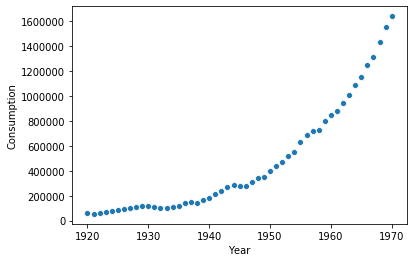

In [22]:
sns.scatterplot('Year','Consumption',data=df)

In [23]:
X=df['Year']

In [24]:
y=df['Consumption']

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) order issue

In [28]:
# X_train=X_train.sort_values()#to make plot correctly
# X_test=X_test.sort_values()
# y_train=y_train.sort_values()
# y_test=y_test.sort_values()

In [29]:
size = len(df.index)
index = range(0, size, 5)

train = df[~df.index.isin(index)]
test = df[df.index.isin(index)]


In [30]:
# converting X to a two dimensional array, as required by the learning algorithm
X_train = train.Year.values.reshape(-1,1) #Making X two dimensional
y_train = train.Consumption

X_test = test.Year.values.reshape(-1,1) #Making X two dimensional
y_test = test.Consumption

In [31]:
X_train.shape

(40, 1)

In [32]:
from sklearn.metrics import r2_score

In [16]:
X_train.shape

(40, 1)

In [17]:
y_train.shape

(40,)

[Pipeline] ..... (step 1 of 2) Processing poly_features, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


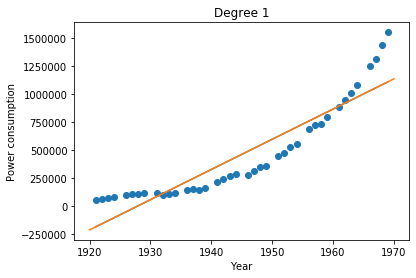

[Pipeline] ..... (step 1 of 2) Processing poly_features, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


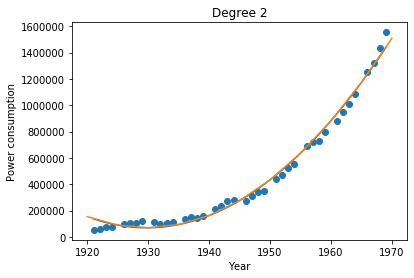

[Pipeline] ..... (step 1 of 2) Processing poly_features, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


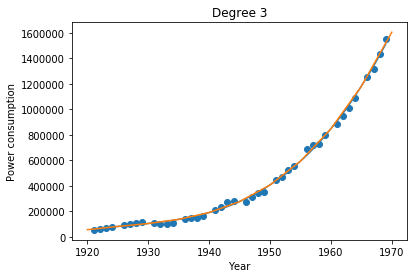

In [18]:
degrees=[1,2,3]
r2_test=[]
r2_train=[]
for degree in degrees:
    pipeline=Pipeline(steps=[('poly_features',PolynomialFeatures(degree=degree)),('model',LinearRegression())],verbose=True)
    pipeline.fit(X_train,y_train)
  
    y_test_predict=pipeline.predict(X_test)
    r2_test.append(r2_score(y_test,y_test_predict))
    
    y_train_predict=pipeline.predict(X_train)
    r2_train.append(r2_score(y_train,y_train_predict))
    
    #labels and title 
    fig,ax=plt.subplots()
    ax.set_xlabel("Year")                                
    ax.set_ylabel("Power consumption")
    ax.set_title("Degree "+str(degree))
    
    #plots for train
    ax.scatter(X_train,y_train)
    ax.plot(X_train,y_train_predict)
    #plots for test
    #ax.scatter(X_test,y_test)
    ax.plot(X_test,y_test_predict)
    
    plt.show()

In [19]:
r2_test

[0.816517046382681, 0.9876080502746136, 0.9984899918580936]